In [36]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from google.colab import files

In [37]:
# Only execute this cell if you want to use datasets from Kaggle directly -  source Analytics Vidya
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [40]:
#First way - Upload file to add to the files icon to the left side of the Colab
file = ('/content/Debernardi et al 2020 data.csv');
newData = pd.read_csv(file);


In [41]:
newData.head()

,sample_id,patient_cohort,sample_origin,age,sex,diagnosis,stage,benign_sample_diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,S1,Cohort1,BPTB,33,F,1,NaN,NaN,11.7,1.83222,0.893219,52.94884,654.282174,1262.000
1,S10,Cohort1,BPTB,81,F,1,NaN,NaN,NaN,0.97266,2.037585,94.46703,209.488250,228.407
2,S100,Cohort2,BPTB,51,M,1,NaN,NaN,7.0,0.78039,0.145589,102.36600,461.141000,NaN
3,S101,Cohort2,BPTB,61,M,1,NaN,NaN,8.0,0.70122,0.002805,60.57900,142.950000,NaN
4,S102,Cohort2,BPTB,62,M,1,NaN,NaN,9.0,0.21489,0.000860,65.54000,41.088000,NaN


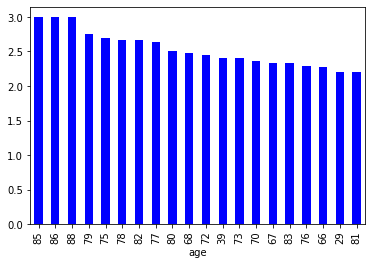

In [42]:
newData.groupby('age')['diagnosis'].mean().nlargest(20).plot.bar(color='blue')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


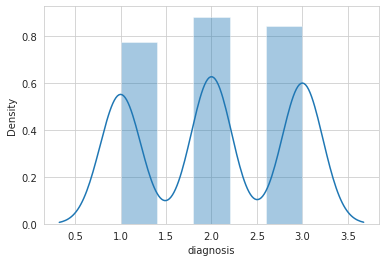

In [43]:
# Calc the diagnosis distribution
sns.set_style(style='whitegrid')
sns.distplot(newData['diagnosis'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


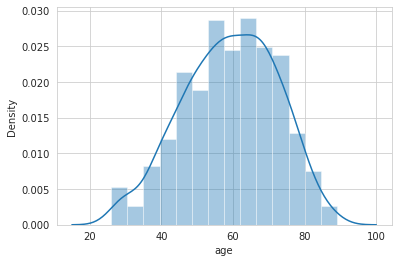

In [ ]:
# Calc the age distribution
sns.set_style(style='whitegrid')
sns.distplot(newData['age'])

Text(0.5, 0, 'Number of outlets')

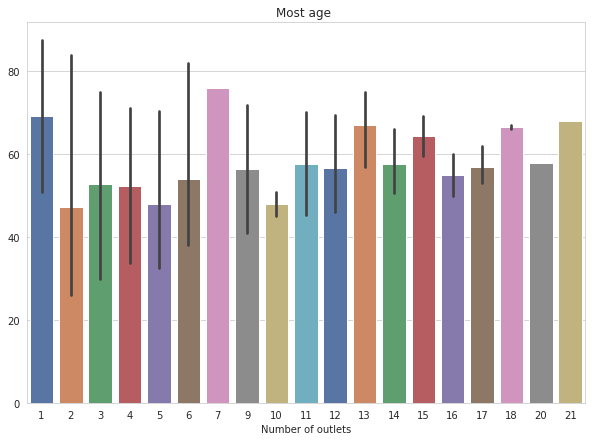

In [ ]:
plt.figure(figsize=(10,7))
chains=newData['age'].value_counts()[0:100]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("Most age ")
plt.xlabel("Number of outlets") 

In [ ]:
px.histogram(newData, x="age", y="diagnosis", color="sex")

In [ ]:
#Pr-Processing for data

newData['sex'].value_counts()


F    299
M    291
Name: sex, dtype: int64

In [ ]:
newData['sex'] = newData['sex'].map({'M': 1, 'F': 0})
newData['sex'] = pd.to_numeric(newData['sex'], errors='coerce')
newData['sex'].value_counts()

0    299
1    291
Name: sex, dtype: int64

In [ ]:
newData['sample_origin'] = newData['sample_origin'].map({'BPTB': 0, 'LIV': 1,'ESP': 2,'UCL': 3})
newData['sample_origin'] = pd.to_numeric(newData['sample_origin'], errors='coerce')
newData["sample_origin"].value_counts()

0    409
1    132
2     29
3     20
Name: sample_origin, dtype: int64

In [ ]:
newData.info()
from statistics import variance
import pandas as pd
import numpy as np
import matplotlib as plt
import sklearn
from sklearn.model_selection import train_test_split #sklearn import does not automatically install sub packages
from sklearn import linear_model
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Preprocessing


# Convert diagnosis from series to factor 

final_df = newData[newData.diagnosis != 3] # Exclude all the categories that are already diagnosed with cancer
final_df
final_df.drop(labels= ['sample_id','patient_cohort','sample_origin','stage','benign_sample_diagnosis','REG1A','plasma_CA19_9'], axis=1,inplace=True) #drop labels that won't matter for the model

final_df['diagnosis'] = final_df['diagnosis'].map({1:0,2:1})
final_df['sex'] = final_df['sex'].map({"F":0,"M":1})

# Logistic regression

	#Split data into training and test
Y = final_df['diagnosis'] # Y = dependent variable which is diagnosis labeled as 0 and 1
X = final_df.loc[:, final_df.columns != "diagnosis"] #regressors/predictors/independent variabls

#Visualization




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sample_id                590 non-null    object 
 1   patient_cohort           590 non-null    object 
 2   sample_origin            590 non-null    int64  
 3   age                      590 non-null    int64  
 4   sex                      590 non-null    int64  
 5   diagnosis                590 non-null    int64  
 6   stage                    199 non-null    object 
 7   benign_sample_diagnosis  208 non-null    object 
 8   plasma_CA19_9            350 non-null    float64
 9   creatinine               590 non-null    float64
 10  LYVE1                    590 non-null    float64
 11  REG1B                    590 non-null    float64
 12  TFF1                     590 non-null    float64
 13  REG1A                    306 non-null    float64
dtypes: float64(6), int64(4), o

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



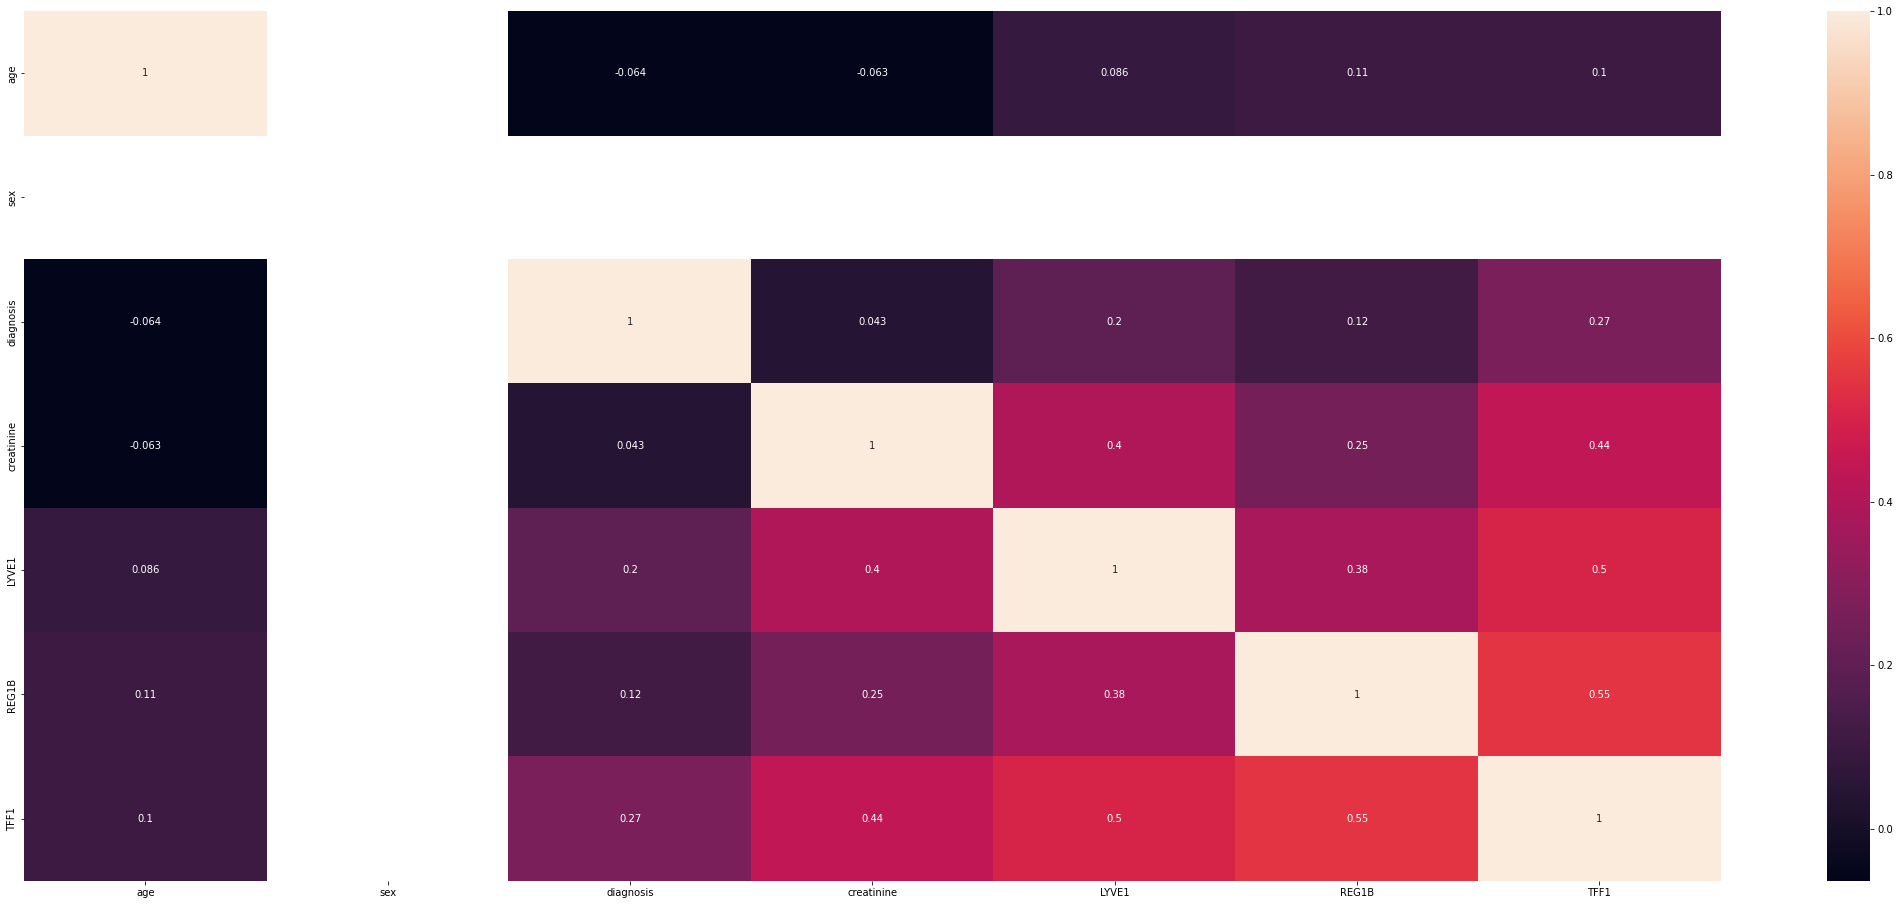

In [ ]:
	#Correlation
import matplotlib.pyplot as plt
plt.figure(figsize=(38,16))
sns.heatmap(final_df.corr(),annot=True)
plt.show() # We can see that there are some variables that are correlated with one another. This might result in some multicolinearity (VIF > 2) which may be solved by removing certain variables that may be acting as cofounder variables (removing variables whose correlation > 0.7 for example)
	

In [ ]:
	# Assumptions
		#Multicolinearity	

vif = pd.DataFrame()
vif['feature'] = X.columns

X.drop(['age','sex'],axis=1,inplace=True)
vif = pd.DataFrame()
vif['feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
print(vif) #We'll keep these features without age and sex

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.20, random_state = 5, stratify = Y)

      feature       VIF
0  creatinine  2.121519
1       LYVE1  2.234572
2       REG1B  1.891559
3        TFF1  2.455088


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#Before supplying the data to the classifier, dataset needs to be scaled 
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

	#Model statistics

lr = LogisticRegression()
lr.fit(X_train_scaled,Y_train)
train_acc = lr.score(X_train_scaled, Y_train)
print("The Accuracy for Training Set is {}".format(train_acc*100))

# Check performance on test Set
y_pred = lr.predict(X_test)


The Accuracy for Training Set is 66.66666666666666


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names



In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, Y_train)

DecisionTreeRegressor()

In [ ]:
print('Ridge Regression Train Score is : ' , regressor.score(X_train, Y_train))
print('Ridge Regression Test Score is : ' , regressor.score(X_test, Y_test))

Ridge Regression Train Score is :  1.0
Ridge Regression Test Score is :  -0.32175032175032126


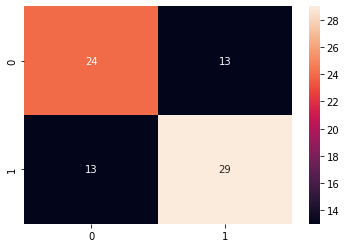

In [ ]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, y_pred)
f = sns.heatmap(cm, annot=True, fmt='d')


In [ ]:
total=sum(sum(cm))

sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.6486486486486487
Specificity :  0.6904761904761905


In [ ]:
total=sum(sum(cm))

ppv = cm[0,0]/(cm[0,0]+cm[0,1])
print('ppv : ', ppv )

npv = cm[1,1]/(cm[1,0]+cm[1,1])
print('npv : ', npv)

ppv :  0.6486486486486487
npv :  0.6904761904761905


In [ ]:
from sklearn.metrics import f1_score
#Calculating F1 Score  : 2 * (precision * recall) / (precision + recall)
# f1_score(y_true, y_pred, labels=None, pos_label=1, average=’binary’, sample_weight=None)
F1Score = f1_score(Y_test, y_pred, average='micro') #it can be : binary,macro,weighted,samples
print('F1 Score is : ', F1Score)

F1 Score is :  0.6708860759493671
